In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import xgboost
from sklearn.metrics import classification_report
import numpy as np
import shap


In [30]:
df = pd.read_csv('diabetes.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

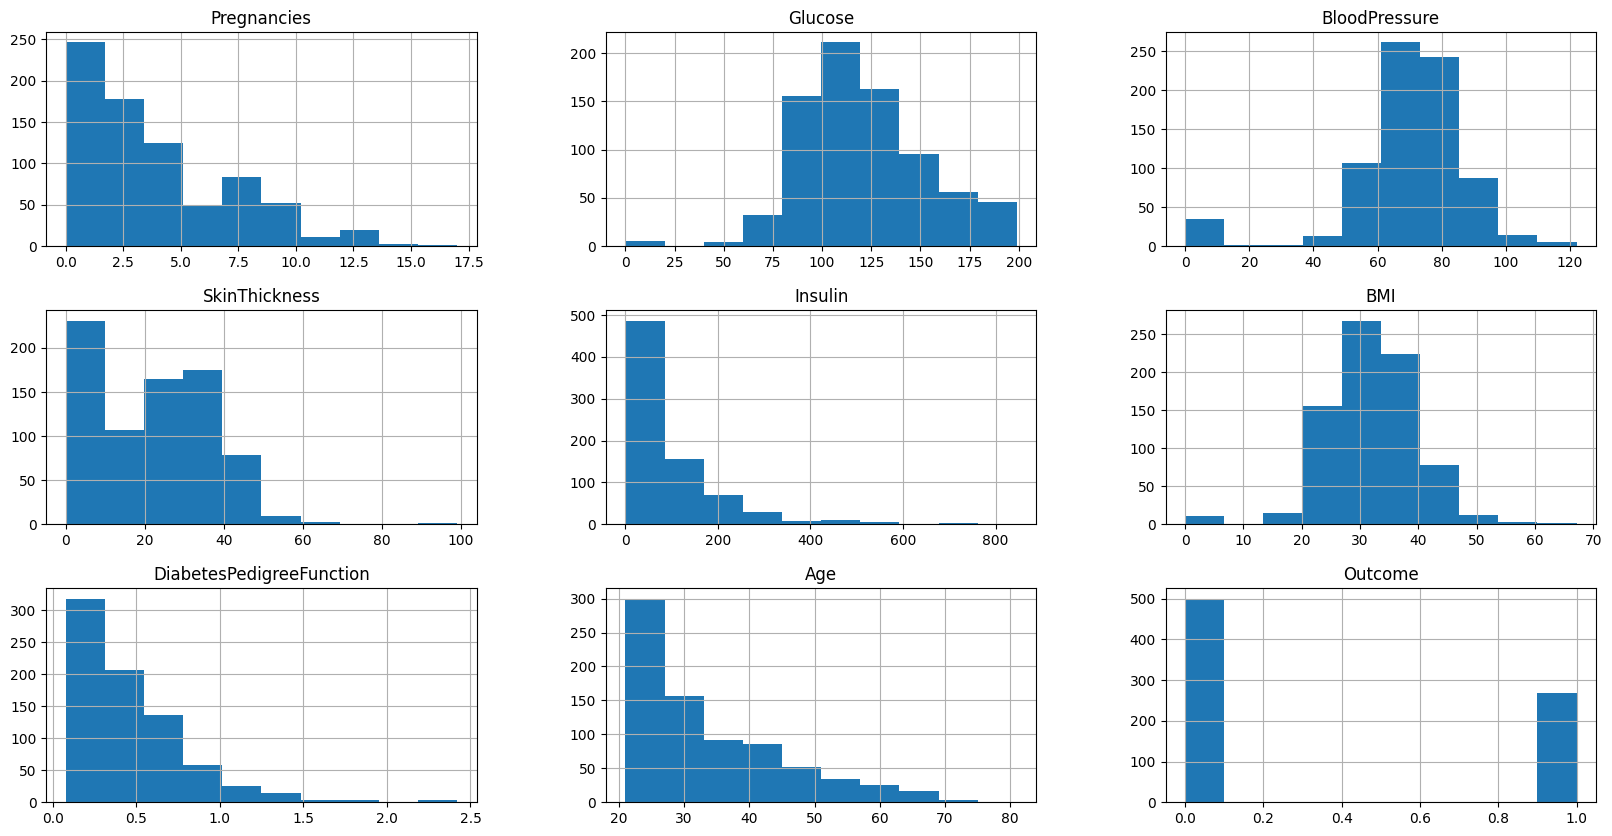

In [33]:
df.hist(figsize=(20,10))
plt.show()

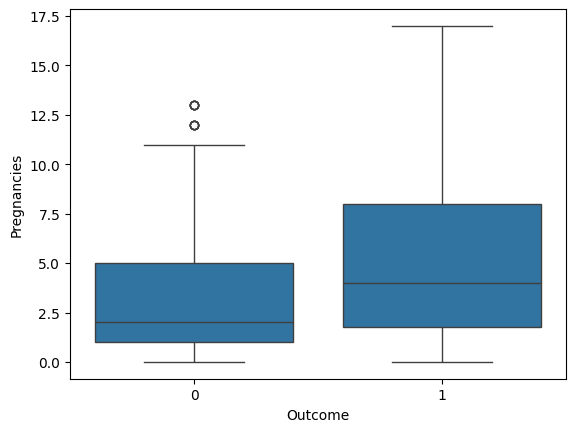

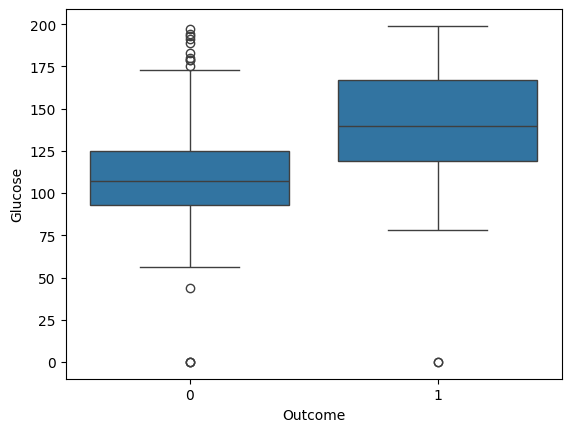

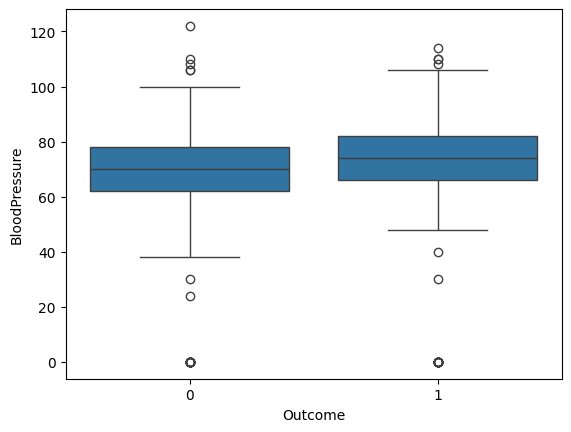

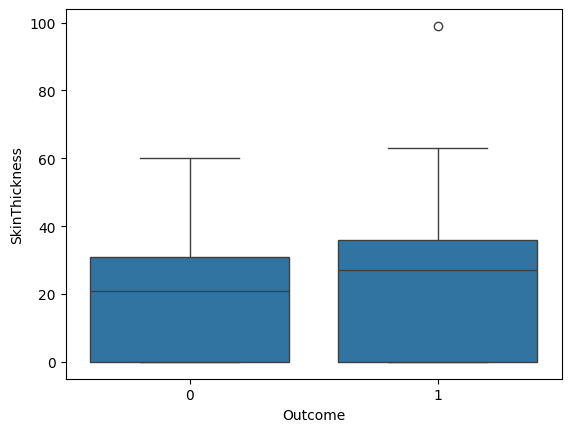

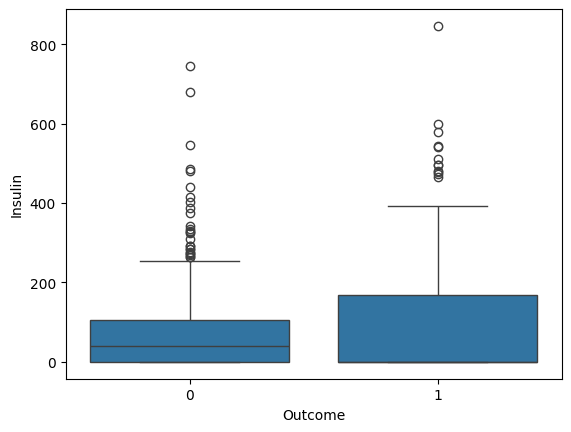

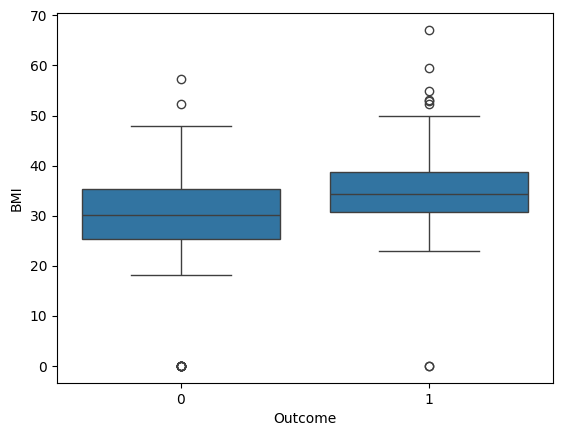

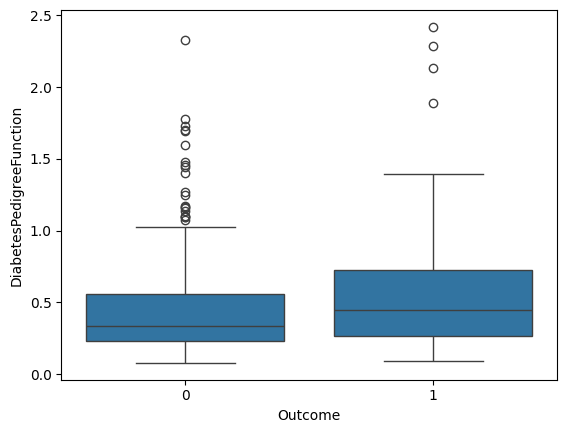

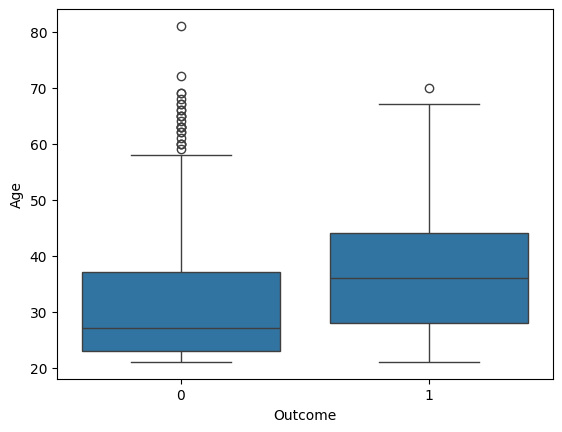

In [34]:
for col in df.columns.to_list():
    if col != "Outcome":
        sns.boxplot(x = 'Outcome', y = col, data = df)
        plt.show()


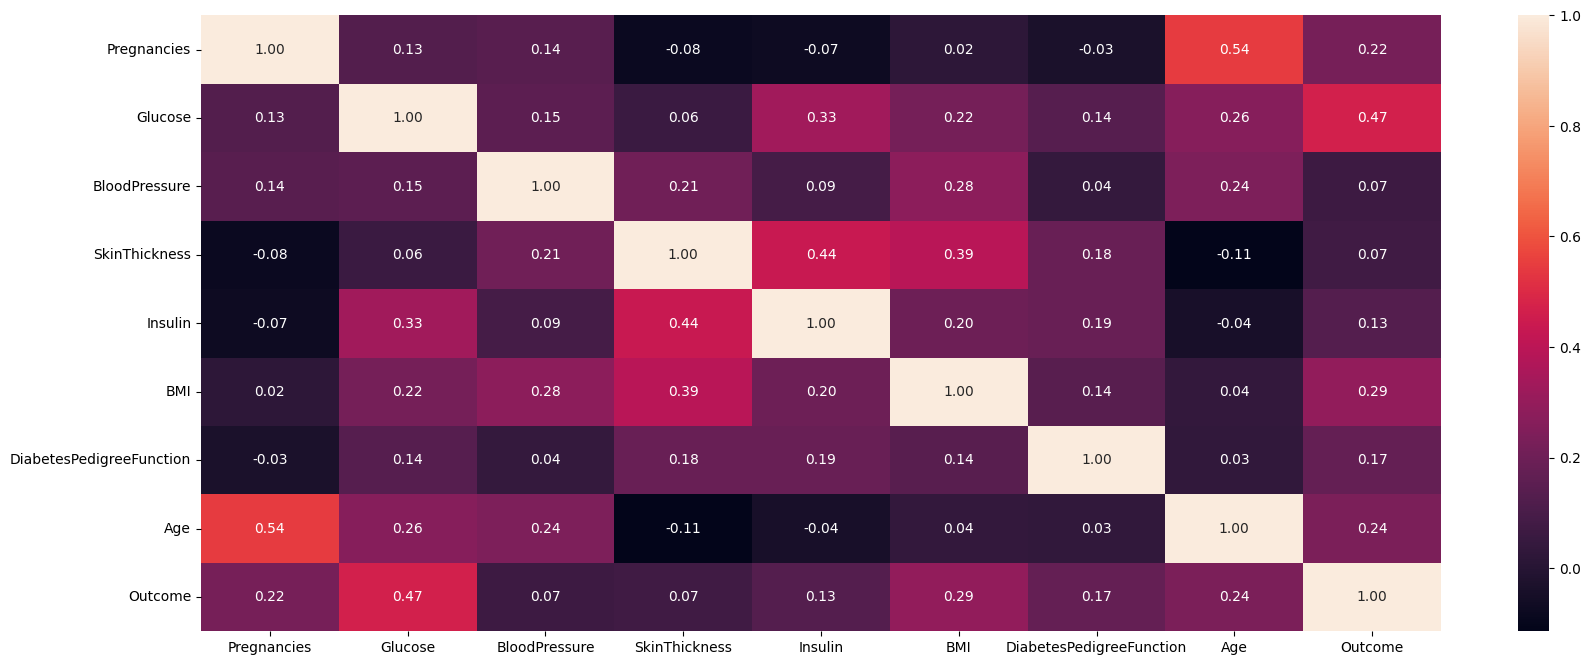

In [35]:
# heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
plt.show()

In [36]:
X = df.drop('Outcome', axis = 1)
y = df.Outcome

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state= 42)

In [38]:
y_train.value_counts()

Outcome
0    424
1    228
Name: count, dtype: int64

In [39]:
y_test.value_counts()

Outcome
0    76
1    40
Name: count, dtype: int64

In [40]:
params = {
    'max_depth' : [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 1000],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 1, 2, 4, 5], #L1 term
    'reg_lambda': [0, 1, 2, 4, 5], #L2 term
    'gamma': [0, 0.1, 0.2], # Regularization parammeter
    'subsample': [0.6, 0.8, 1.0], # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0] # Fraction of features used for each tree
    }

In [41]:
xgb = xgboost.XGBClassifier(learning_rate = 0.02, silent = True, nthread = -1)

In [42]:
folds = 3
para_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=para_comb, scoring='f1_macro', n_jobs=4, cv = skf.split(X_test, y_test), random_state=1001)

In [43]:
random_search.fit(X_train, y_train)

/Users/purushottambajaj/Downloads/Explainable-AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/purushottambajaj/Downloads/Explainable-AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/purushottambajaj/Downloads/Explainable-AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/purushottambajaj/Downloads/Explainable-AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Par

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x1229da5f0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=No...
                                           nthread=-1, num_parallel_tree=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 1, 2, 4, 5],
                                        'reg_lambda': [0, 1, 2, 4, 5],
                                        'scale_pos_weight': [1, 10, 25, 50, 75,
                                                             99, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='f1_macro')

In [44]:
random_search.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 10,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [45]:
params = {'subsample': 0.8,
 'scale_pos_weight': 10,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [46]:
xgb.set_params(**params)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [47]:
xgb.fit(X_train, y_train)

/Users/purushottambajaj/Downloads/Explainable-AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [48]:
xgb_predictions_train = xgb.predict_proba(X_train)
print(classification_report(y_train, np.argmax(xgb_predictions_train,axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86       424
           1       0.68      1.00      0.81       228

    accuracy                           0.84       652
   macro avg       0.84      0.87      0.83       652
weighted avg       0.89      0.84      0.84       652



In [49]:
xgb_predictions_test = xgb.predict_proba(X_test)
print(classification_report(y_test, np.argmax(xgb_predictions_test,axis = 1)))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80        76
           1       0.62      0.93      0.74        40

    accuracy                           0.78       116
   macro avg       0.78      0.81      0.77       116
weighted avg       0.83      0.78      0.78       116



In [50]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

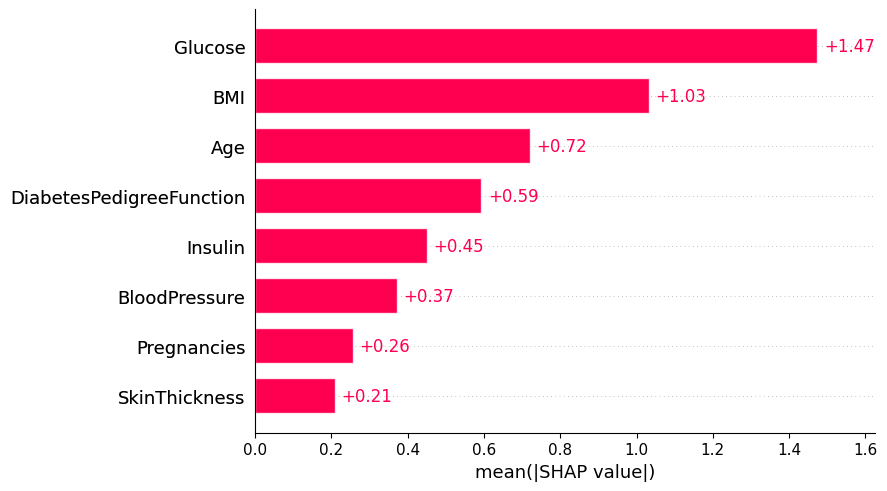

In [51]:
shap.plots.bar(shap_values)

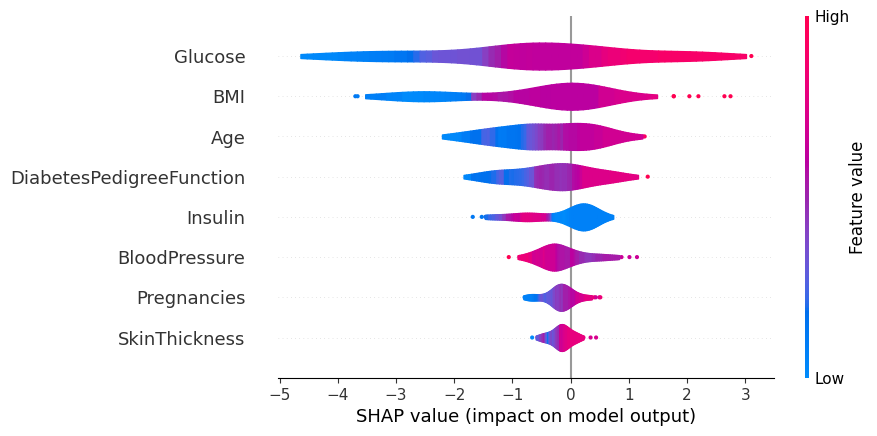

In [52]:
shap.plots.violin(shap_values)

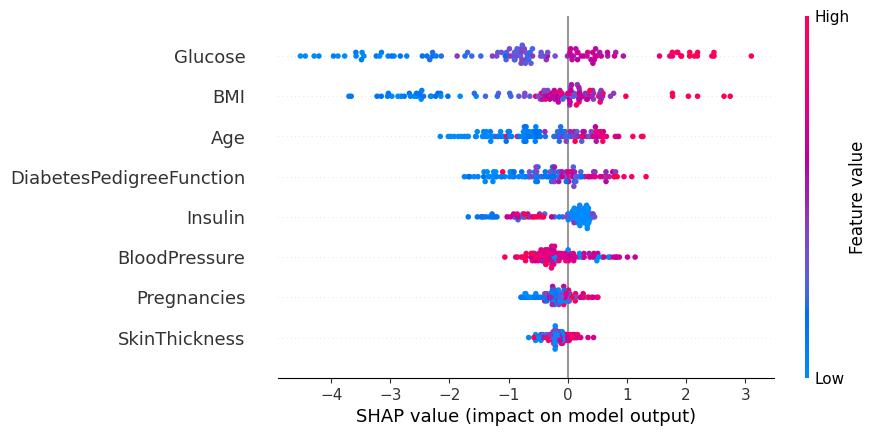

In [59]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.partial_dependence('BMI', xgb, X_test, shap_values)